In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from tqdm import trange
import pandas as pd
import matplotlib.cm as cm

votes = np.loadtxt('data_lab2/votes.dat', delimiter= ',' , dtype=float).reshape(349, 31)
genders = np.loadtxt('data_lab2/mpsex.dat' , dtype=int,comments='%').reshape(349,1)
parties = np.loadtxt('data_lab2/mpparty.dat' , dtype=int,comments='%').reshape(349,1)
districts = np.loadtxt('data_lab2/mpdistrict.dat' , dtype=int,comments='%').reshape(349,
1)

In [2]:
class SOM:
    def __init__(self,inputs,num_nodes):
        self.inputs=inputs
        self.num_nodes=num_nodes
        self.W = np.random.rand(num_nodes[0],num_nodes[1],inputs.shape[1])

    def GetClosetOne(self,x):
        dist =(x-self.W)
        # print("___________________________")
        # print("\nx:\n",x,"\nW:\n",self.W,"\ndist:\n",dist,"\ndist*dist:\n",np.multiply(dist,dist),"\nsum:\n",np.sum(np.multiply(dist,dist),axis=-1),'\nnode:',np.argmin(np.sum(np.multiply(dist,dist),axis=-1)))
        # print("___________________________")
        temp=np.sum(np.multiply(dist,dist),axis=-1)
        return np.unravel_index(np.argmin(temp),temp.shape)

    def UpdateWeights(self,x,Np,radius,lr):
        lx = int(Np[0]-radius) if Np[0]-radius>0 else 0
        ly = int(Np[1]-radius) if Np[1]-radius>0 else 0
        rx = int(Np[0]+radius) if Np[0]+radius<self.W.shape[0] else self.W.shape[0]
        ry = int(Np[1]+radius) if Np[1]+radius<self.W.shape[1] else self.W.shape[1]
        for i in range(lx,rx):
            for j in range(ly,ry):
                self.W[i][j]+=lr*(x-self.W[i][j])
           
    def train(self,epochs=20,lr=0.2,C=6):
        X = self.inputs
        for epoch in trange(epochs):
            radius =np.round(C*(1-epoch/epochs))
            for i,x in enumerate(X):
                Np = self.GetClosetOne(x)
                self.UpdateWeights(x,Np,radius,lr)
    def use(self,X):
        result = []
        for i,x in enumerate(X):                
            Np = self.GetClosetOne(x)
            result.append(Np)
        return result

In [3]:
test = SOM(votes,(10,10))
test.train()
result = test.use(votes)

100%|██████████| 20/20 [00:02<00:00, 11.14it/s]


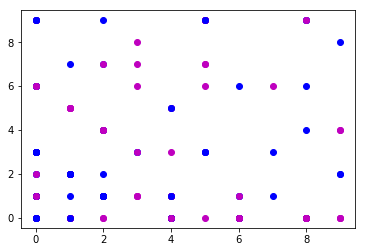

In [4]:
for i in range(votes.shape[0]):
    x,y = result[i]
    plt.plot(x,y,'mo' if genders[i]==0 else 'bo')
plt.show()

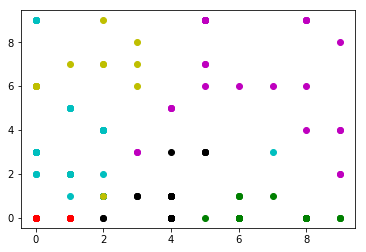

In [6]:
colors=['bo','go','ro','co','mo','yo','ko','grey']
for i in range(votes.shape[0]):
    x,y = result[i]
    plt.plot(x,y,colors[parties[i][0]])
plt.show()

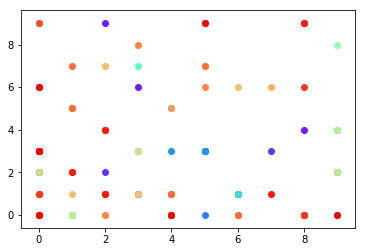

In [8]:
colors = cm.rainbow(np.linspace(0, 1, 30))
for i in range(votes.shape[0]):
    x,y = result[i]
    plt.scatter(x,y,color=colors[districts[i][0]])
plt.show()